<a href="https://colab.research.google.com/github/subhamghimire/Machine-Learning/blob/master/911DataCapstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [123]:
#Download Dataset from this link: https://www.kaggle.com/mchirico/montcoalert
df = pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630566 entries, 0 to 630565
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        630566 non-null  float64
 1   lng        630566 non-null  float64
 2   desc       630566 non-null  object 
 3   zip        553836 non-null  float64
 4   title      630566 non-null  object 
 5   timeStamp  630566 non-null  object 
 6   twp        630297 non-null  object 
 7   addr       630566 non-null  object 
 8   e          630566 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 43.3+ MB


In [67]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


In [68]:
df['zip'].value_counts().head(5)

19401.0    43001
19464.0    41524
19403.0    33048
19446.0    30612
19406.0    21385
Name: zip, dtype: int64

In [69]:
df['twp'].value_counts().head(5)

LOWER MERION    53016
ABINGTON        38005
NORRISTOWN      35426
UPPER MERION    34422
CHELTENHAM      29075
Name: twp, dtype: int64

In [70]:
df['title'].nunique()

147

In [0]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [98]:
df['Reason']

0          EMS
1          EMS
2         Fire
3          EMS
4          EMS
          ... 
630561     EMS
630562     EMS
630563     EMS
630564     EMS
630565    Fire
Name: Reason, Length: 630566, dtype: object

In [99]:
df['Reason'].value_counts()

EMS        314860
Traffic    221244
Fire        94462
Name: Reason, dtype: int64

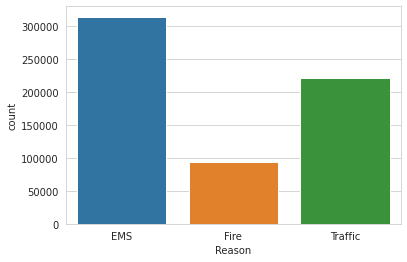

In [100]:
sns.countplot(x='Reason',data=df)

In [101]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [0]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [0]:
time = df['timeStamp'].iloc[0]

In [104]:
time

Timestamp('2015-12-10 17:10:52')

In [0]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [0]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [0]:
df['Day of Week'] = df['Day of Week'].map(dmap)

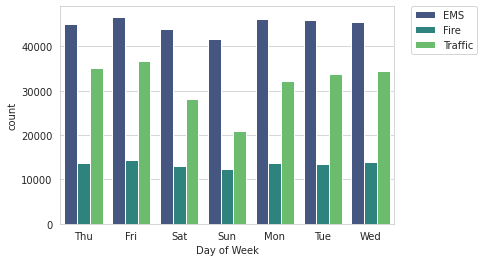

In [108]:
sns.countplot(x='Day of Week',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

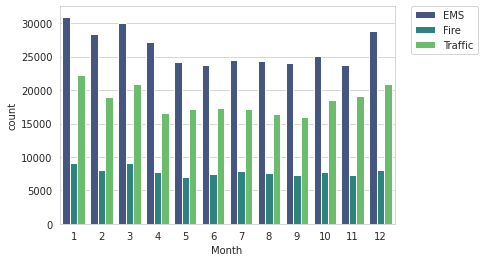

In [109]:
sns.countplot(x='Month',data=df,hue='Reason',palette='viridis')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [110]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,62336,62336,62336,55294,62336,62336,62312,62336,62336,62336,62336,62336,62336
2,55427,55427,55427,48922,55427,55427,55405,55427,55427,55427,55427,55427,55427
3,60027,60027,60027,53252,60027,60027,60001,60027,60027,60027,60027,60027,60027
4,51559,51559,51559,45431,51559,51559,51545,51559,51559,51559,51559,51559,51559
5,48467,48467,48467,42257,48467,48467,48443,48467,48467,48467,48467,48467,48467


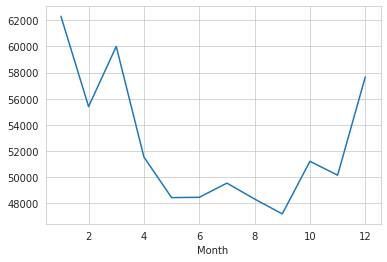

In [111]:
# Could be any column
byMonth['twp'].plot()

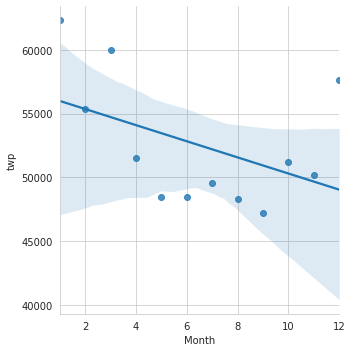

In [112]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())

In [0]:
df['Date']=df['timeStamp'].apply(lambda t: t.date())

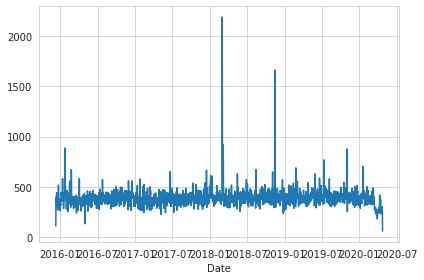

In [114]:
df.groupby('Date').count()['twp'].plot()
plt.tight_layout()

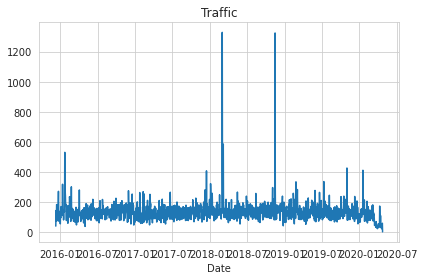

In [115]:
df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

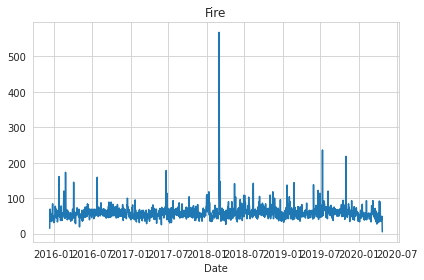

In [116]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

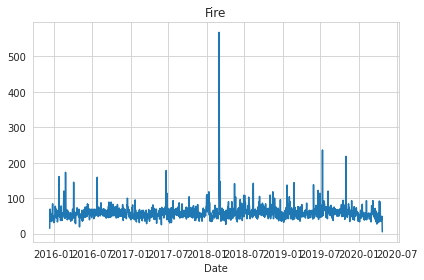

In [117]:
df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

In [118]:
dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,
Fri,1867,1533,1369,1238,1242,1556,2561,3991,4829,5023,5334,5523,5666,5857,6063,6682,6759,6804,5389,4791,4137,3683,3244,2710
Mon,1785,1477,1294,1205,1271,1745,2576,4279,5321,5486,5199,5383,5573,5340,5380,5881,6042,6140,5186,4261,3585,3077,2517,1962
Sat,2315,1956,1806,1513,1373,1493,1789,2389,3301,4117,4698,5177,5291,5121,5144,4919,4943,4943,4753,4523,3932,3704,3050,2819
Sun,2308,2049,1851,1525,1403,1398,1651,2288,2870,3548,4088,4239,4633,4411,4482,4247,4306,4285,4173,3958,3539,2975,2473,2200
Thu,1628,1324,1342,1172,1200,1685,2696,4293,5125,5145,5174,5230,5569,5811,5764,6160,6059,6645,5248,4454,3878,3319,2693,2233


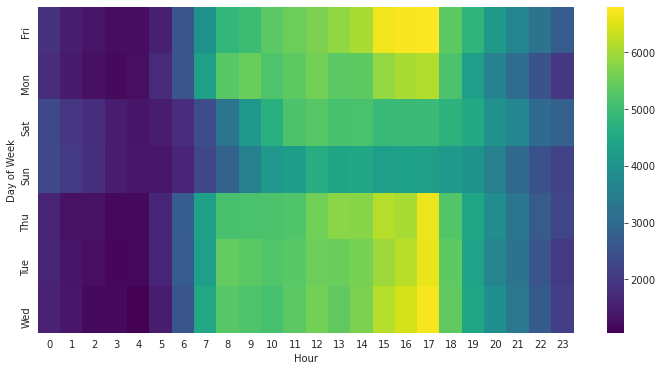

In [119]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis')

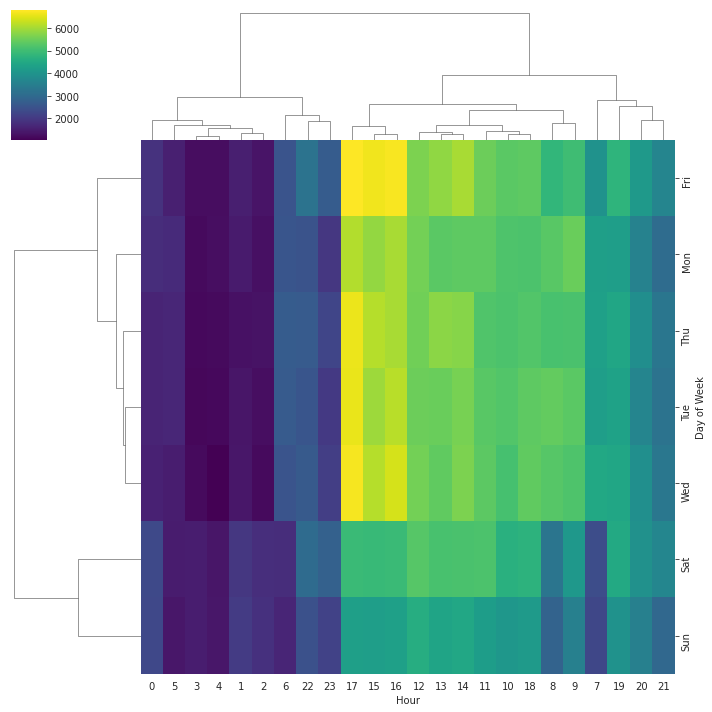

In [120]:
sns.clustermap(dayHour,cmap='viridis')

In [121]:
dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
Fri,9309,8255,10941,7734,7214,7647,7103,7336,7694,6934,8379,9305
Mon,8896,8747,8060,8106,6746,6740,7929,6854,6598,8075,6722,8492
Sat,8475,7593,8050,7270,5796,6839,6395,6111,6566,6609,6773,8592
Sun,7478,6452,6766,6646,5410,5673,6567,5275,5956,6316,5196,7165
Thu,9055,7997,8849,7155,7524,7850,6964,7508,6954,7482,8358,8151


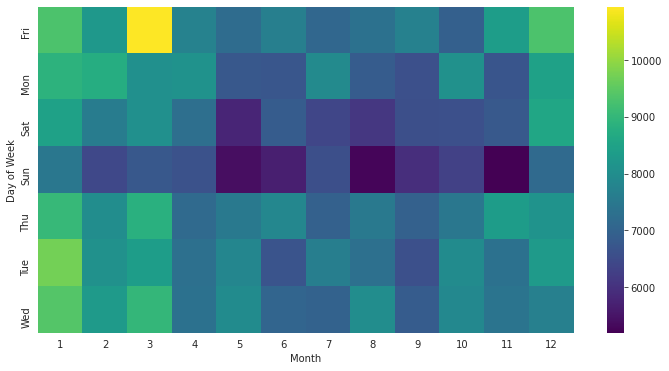

In [122]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='viridis')